In [1]:
# Import pandas for manipulating numerical tables
import pandas as pd

# Import numpy for numerical calculations
import numpy as np

# Import matplotlib for plotting data
import matplotlib.pyplot as plt
%matplotlib inline

# Import scipy-stats for statistical analysis and outlier detection
from scipy import stats as st

# Import missingno for visualizations
import missingno as msno

# Import IterativeImputer for imputations
from fancyimpute import IterativeImputer

# Import seaborn for visualiztions
import seaborn as sns

# Import PCA for principle component analysis
from sklearn.decomposition import PCA

# Import Counter for counting instances
from collections import Counter

In [2]:
# Importing the churn dataset
df = pd.read_csv('C:/users/eric7/D206/churn_database/churn_raw_data.csv')

In [3]:
# Just checking to see if the data is there
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [4]:
# Check shape of df
print(df.shape)
# 10000 rows or instances and 52 columns or variables

(10000, 52)


In [5]:
# Check df info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [6]:
# Check for duplicates
df.duplicated().sum()

0

In [7]:
# Check for null values
print(df.isnull().sum())

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

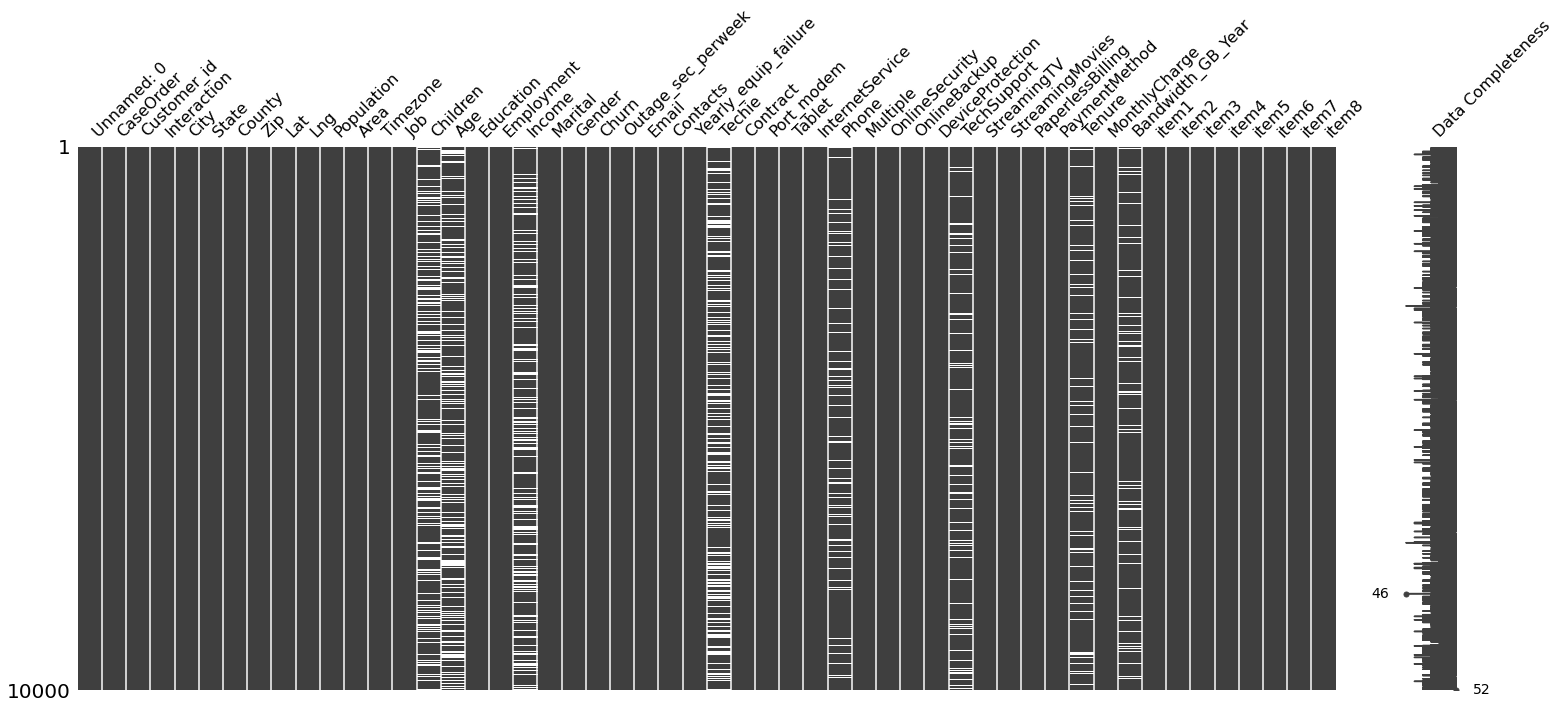

In [8]:
# Visualize df for missingness
msno.matrix(df, labels = True)
plt.show()

In [9]:
# Create a copy of df
df1 = df.copy()

In [10]:
# Checking variables unique values for validity
print(df1['Zip'].sort_values().unique())

[  601   610   647 ... 99923 99927 99929]


In [11]:
# Checking variables unique values for validity
print(df1['Area'].sort_values().unique())

['Rural' 'Suburban' 'Urban']


In [12]:
# Checking variables unique values for validity
print(df1['Children'].sort_values().unique())

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]


In [13]:
# Checking variables unique values for validity
print(df1['Age'].sort_values().unique())

[18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 nan]


In [14]:
# Checking variables unique values for validity
print(df1['Education'].sort_values().unique())

['9th Grade to 12th Grade, No Diploma' "Associate's Degree"
 "Bachelor's Degree" 'Doctorate Degree' 'GED or Alternative Credential'
 "Master's Degree" 'No Schooling Completed' 'Nursery School to 8th Grade'
 'Professional School Degree' 'Regular High School Diploma'
 'Some College, 1 or More Years, No Degree'
 'Some College, Less than 1 Year']


In [15]:
# Checking variables unique values for validity
print(df1['Employment'].sort_values().unique())

['Full Time' 'Part Time' 'Retired' 'Student' 'Unemployed']


In [16]:
# Checking variables unique values for validity
print(df1['Income'].sort_values().unique())

[   740.66    901.21    938.81 ... 256998.4  258900.7        nan]


In [17]:
# Checking variables unique values for validity
print(df1['Marital'].sort_values().unique())

['Divorced' 'Married' 'Never Married' 'Separated' 'Widowed']


In [18]:
# Checking variables unique values for validity
print(df1['Gender'].sort_values().unique())

['Female' 'Male' 'Prefer not to answer']


In [19]:
# Checking variables unique values for validity
print(df1['Churn'].sort_values().unique())

['No' 'Yes']


In [20]:
# Checking variables unique values for validity
print(df1['Outage_sec_perweek'].sort_values().unique())

[-1.348571   -1.19542834 -1.099934   ... 46.64180573 47.02766
 47.04928   ]


In [21]:
# Find and count negative time values in Outage_sec_perweek
neg_outage = df1.Outage_sec_perweek[df1.Outage_sec_perweek < 0]
print(neg_outage)
neg_outage.count()

1904   -1.195428
1997   -0.339214
3069   -0.206145
3629   -0.152845
4167   -1.348571
4184   -0.352431
4427   -1.099934
6093   -0.787115
6463   -0.144644
6577   -0.527396
8194   -0.214328
Name: Outage_sec_perweek, dtype: float64


11

In [22]:
# Make the bad values NaN
df1.Outage_sec_perweek[df1.Outage_sec_perweek < 0] = np.nan

C:\Users\eric7\AppData\Local\Temp/ipykernel_12360/1312198317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Outage_sec_perweek[df1.Outage_sec_perweek < 0] = np.nan


In [23]:
# Drop the bad values from df
df1 = df1.dropna(subset = ['Outage_sec_perweek'])

In [24]:
# Check to see if they are gone. We have 11 less instances now
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9989 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9989 non-null   int64  
 1   CaseOrder             9989 non-null   int64  
 2   Customer_id           9989 non-null   object 
 3   Interaction           9989 non-null   object 
 4   City                  9989 non-null   object 
 5   State                 9989 non-null   object 
 6   County                9989 non-null   object 
 7   Zip                   9989 non-null   int64  
 8   Lat                   9989 non-null   float64
 9   Lng                   9989 non-null   float64
 10  Population            9989 non-null   int64  
 11  Area                  9989 non-null   object 
 12  Timezone              9989 non-null   object 
 13  Job                   9989 non-null   object 
 14  Children              7495 non-null   float64
 15  Age                  

In [25]:
# Checking variables unique values for validity
print(df1['Email'].sort_values().unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [26]:
# Checking variables unique values for validity
print(df1['Contacts'].sort_values().unique())

[0 1 2 3 4 5 6 7]


In [27]:
# Checking variables unique values for validity
print(df1['Yearly_equip_failure'].sort_values().unique())

[0 1 2 3 4 6]


In [28]:
# Checking variables unique values for validity
print(df1['Techie'].sort_values().unique())

['No' 'Yes' nan]


In [29]:
# Checking variables unique values for validity
print(df1['Contract'].sort_values().unique())

['Month-to-month' 'One year' 'Two Year']


In [30]:
# Checking variables unique values for validity
print(df1['Port_modem'].sort_values().unique())

['No' 'Yes']


In [31]:
# Checking variables unique values for validity
print(df1['Tablet'].sort_values().unique())

['No' 'Yes']


In [32]:
# Checking variables unique values for validity
print(df1['InternetService'].sort_values().unique())

['DSL' 'Fiber Optic' 'None']


In [33]:
# Checking variables unique values for validity
print(df1['Phone'].sort_values().unique())

['No' 'Yes' nan]


In [34]:
# Checking variables unique values for validity
print(df1['Multiple'].sort_values().unique())

['No' 'Yes']


In [35]:
# Checking variables unique values for validity
print(df1['OnlineSecurity'].sort_values().unique())

['No' 'Yes']


In [36]:
# Checking variables unique values for validity
print(df1['OnlineBackup'].sort_values().unique())

['No' 'Yes']


In [37]:
# Checking variables unique values for validity
print(df1['DeviceProtection'].sort_values().unique())

['No' 'Yes']


In [38]:
# Checking variables unique values for validity
print(df1['TechSupport'].sort_values().unique())

['No' 'Yes' nan]


In [39]:
# Checking variables unique values for validity
print(df1['StreamingTV'].sort_values().unique())

['No' 'Yes']


In [40]:
# Checking variables unique values for validity
print(df1['StreamingMovies'].sort_values().unique())

['No' 'Yes']


In [41]:
# Checking variables unique values for validity
print(df1['PaperlessBilling'].sort_values().unique())

['No' 'Yes']


In [42]:
# Checking variables unique values for validity
print(df1['PaymentMethod'].sort_values().unique())

['Bank Transfer(automatic)' 'Credit Card (automatic)' 'Electronic Check'
 'Mailed Check']


In [43]:
# Checking variables unique values for validity
print(df1['Tenure'].sort_values().unique())

[ 1.00025934  1.005104    1.0185196  ... 71.99418    71.99928
         nan]


In [44]:
# Checking variables unique values for validity
print(df1['MonthlyCharge'].sort_values().unique())

[ 77.50523    77.92452    78.05288   ... 306.268     307.5281242
 315.8786   ]


In [45]:
# Checking variables unique values for validity
print(df1['Bandwidth_GB_Year'].sort_values().unique())

[ 155.5067148  169.3992798  223.4765826 ... 7138.309     7158.982
          nan]


In [46]:
# Checking variables unique values for validity
print(df1['item1'].sort_values().unique())

[1 2 3 4 5 6 7]


In [47]:
# Checking variables unique values for validity
print(df1['item2'].sort_values().unique())

[1 2 3 4 5 6 7]


In [48]:
# Checking variables unique values for validity
print(df1['item3'].sort_values().unique())

[1 2 3 4 5 6 7 8]


In [49]:
# Checking variables unique values for validity
print(df1['item4'].sort_values().unique())

[1 2 3 4 5 6 7]


In [50]:
# Checking variables unique values for validity
print(df1['item5'].sort_values().unique())

[1 2 3 4 5 6 7]


In [51]:
# Checking variables unique values for validity
print(df1['item6'].sort_values().unique())

[1 2 3 4 5 6 7 8]


In [52]:
# Checking variables unique values for validity
print(df1['item7'].sort_values().unique())

[1 2 3 4 5 6 7]


In [53]:
# Checking variables unique values for validity
print(df1['item8'].sort_values().unique())

[1 2 3 4 5 6 7 8]


<AxesSubplot:>

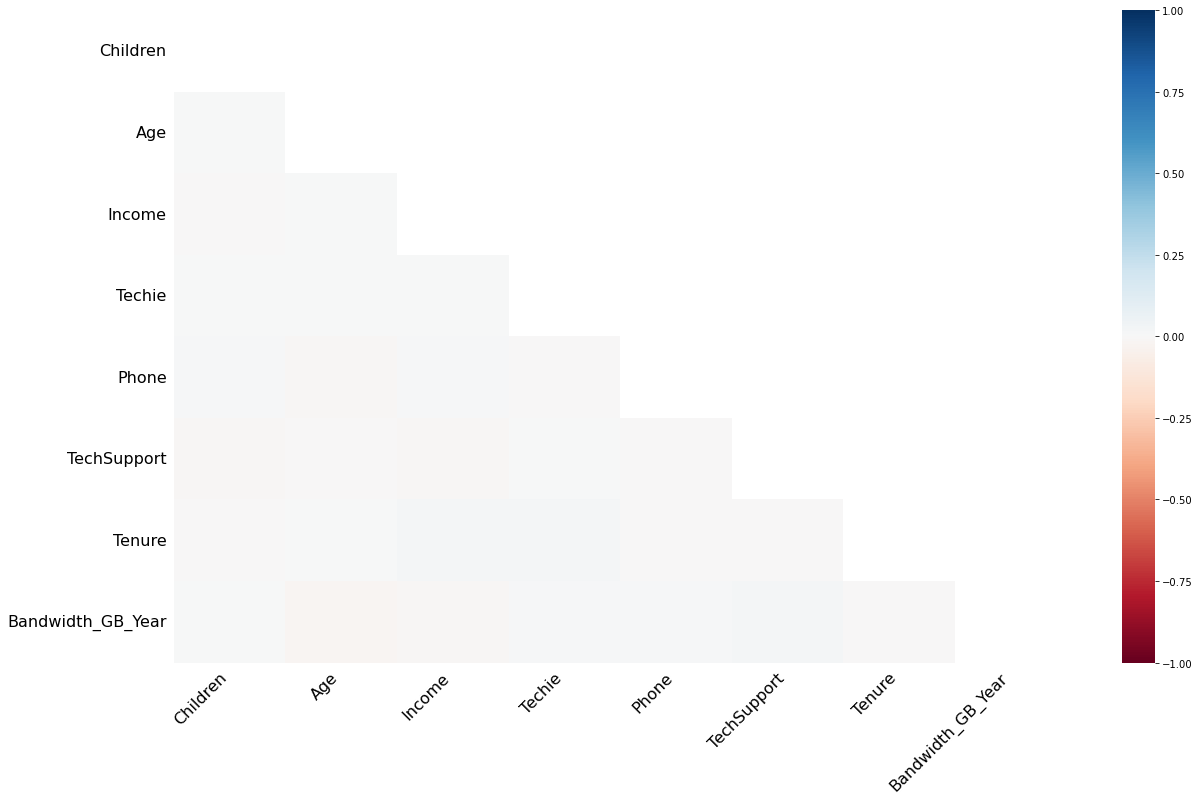

In [54]:
# Check for correlation of missingness
msno.heatmap(df1)

In [55]:
# Check the null values--Outage_sec_perweek should be 0
df1.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2494
Age                     2472
Education                  0
Employment                 0
Income                  2488
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2476
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1025
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [56]:
# Make a copy of df1
df_it_imp = df1.copy()

In [57]:
# Separate the non_numeric type columns
non_numeric_cols = df_it_imp.select_dtypes(exclude='number')

In [58]:
# Drop the non_numeric columns from the copied df
df_it_imp.drop(non_numeric_cols, axis=1, inplace=True)

In [59]:
# Create Imputer object with minimum value set to zero for no negative values
iterative_imputer = IterativeImputer(min_value = 0)

In [60]:
# Impute on numeric columns
df_it_imp.iloc[:, :] = iterative_imputer.fit_transform(df_it_imp)

In [61]:
# Check for null values in numeric columns--Should all be 0
df_it_imp.isna().sum()

Unnamed: 0              0
CaseOrder               0
Zip                     0
Lat                     0
Lng                     0
Population              0
Children                0
Age                     0
Income                  0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
item1                   0
item2                   0
item3                   0
item4                   0
item5                   0
item6                   0
item7                   0
item8                   0
dtype: int64

In [62]:
# Place the cleaned numeric columns back into df1
df1['Children'] = df_it_imp['Children']
df1['Age'] = df_it_imp['Age']
df1['Income'] = df_it_imp['Income']
df1['Tenure'] = df_it_imp['Tenure']
df1['Bandwidth_GB_Year'] = df_it_imp['Bandwidth_GB_Year']

In [63]:
# Check full df for nullity--Should just be categorical variable nullity
df1.isna().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2476
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1025
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [64]:
# Make a copy for mean and median imputation visualizations
df_imp = df.copy()

In [65]:
# Checking variables unique values for validity
print(df1['Children'].sort_values().unique())

[ 0.          0.46076923  0.54601987 ...  8.          9.
 10.        ]


In [66]:
# round the children variable to whole numbers
# because it is a discrete variable
df1['Children'] = round(df1['Children'])

In [67]:
# Check to make sure it worked
print(df1['Children'].sort_values().unique())

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Text(0.5, 1.0, 'Children Before Imputation')

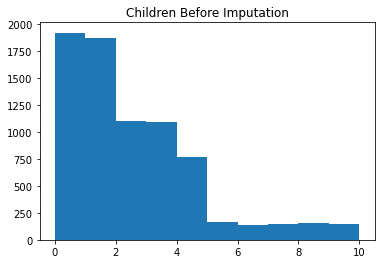

In [68]:
# Comparing histograms before and after imputation
# Original with null values
plt.hist(df['Children'])
plt.title('Children Before Imputation')

In [69]:
# Median imputation
df_imp['Children'].fillna(df_imp['Children'].median(), inplace=True)

Text(0.5, 1.0, 'Children After Median Imputation')

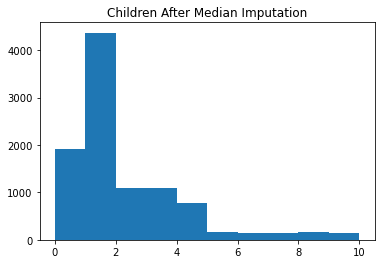

In [70]:
# Comparing histograms before and after imputation
# Using median because the original histogram distribution is skewed
plt.hist(df_imp['Children'])
plt.title('Children After Median Imputation')

Text(0.5, 1.0, 'Children After Iterative Imputation')

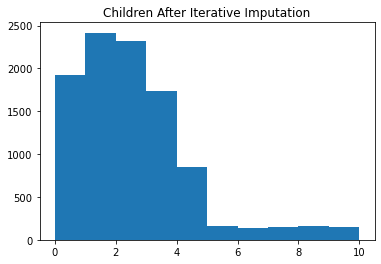

In [71]:
# Comparing histograms before and after imputation
plt.hist(df1['Children'])
plt.title('Children After Iterative Imputation')

Text(0.5, 1.0, 'Age Before Imputation')

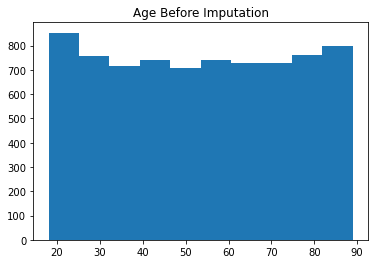

In [72]:
# Comparing histograms before and after imputation
# Original with null values
plt.hist(df['Age'])
plt.title('Age Before Imputation')

In [73]:
# Mean imputation
df_imp['Age'].fillna(df_imp['Age'].mean(), inplace=True)

Text(0.5, 1.0, 'Age After Mean Imputation')

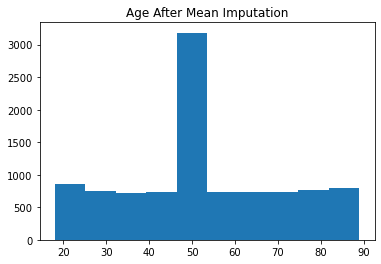

In [74]:
# Comparing histograms before and after imputation
# Using mean because the original histogram distribution is uniform
plt.hist(df_imp['Age'])
plt.title('Age After Mean Imputation')

Text(0.5, 1.0, 'Age After Iterative Imputation')

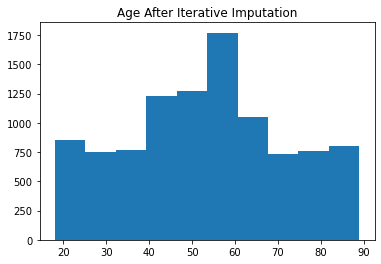

In [75]:
# Comparing histograms before and after imputation
plt.hist(df1['Age'])
plt.title('Age After Iterative Imputation')

Text(0.5, 1.0, 'Income Before Imputation')

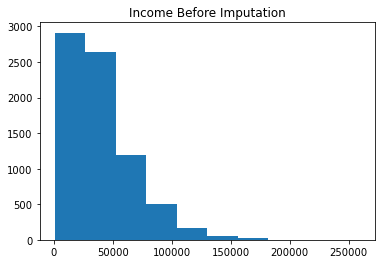

In [76]:
# Comparing histograms before and after imputation
# Original with null values
plt.hist(df['Income'])
plt.title('Income Before Imputation')

In [77]:
# Median imputation
df_imp['Income'].fillna(df_imp['Income'].median(), inplace=True)

Text(0.5, 1.0, 'Income After Median Imputation')

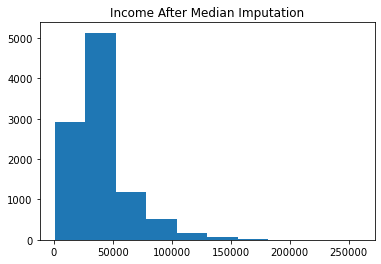

In [78]:
# Comparing histograms before and after imputation
# Using median because the original histogram distribution is skewed
plt.hist(df_imp['Income'])
plt.title('Income After Median Imputation')

Text(0.5, 1.0, 'Income After Iterative Imputation')

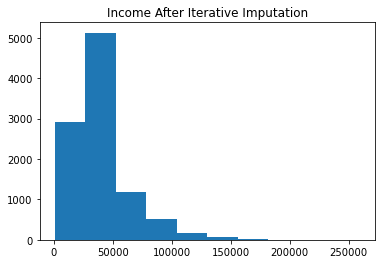

In [79]:
# Comparing histograms before and after imputation
plt.hist(df1['Income'])
plt.title('Income After Iterative Imputation')

Text(0.5, 1.0, 'Techie Before Imputation')

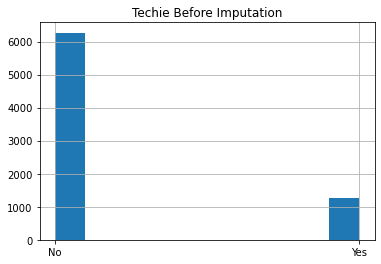

In [80]:
# Comparing histograms before and after imputation
# Original with null values
df['Techie'].hist()
plt.title('Techie Before Imputation')

In [81]:
# Mode imputation
df1['Techie'] = df1['Techie'].fillna(df1['Techie'].mode()[0])

Text(0.5, 1.0, 'Techie After mode Imputation')

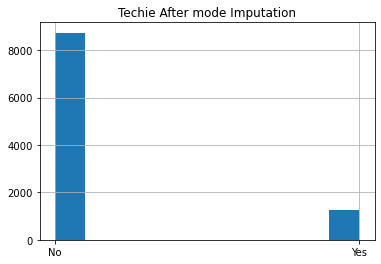

In [82]:
# Comparing histograms before and after imputation
df1['Techie'].hist()
plt.title('Techie After mode Imputation')

Text(0.5, 1.0, 'Phone Before Imputation')

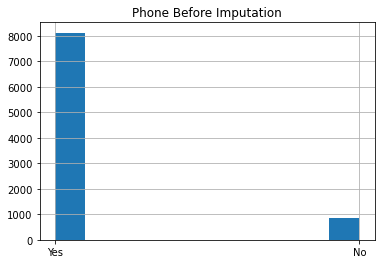

In [83]:
# Comparing histograms before and after imputation
# Original with null values
df['Phone'].hist()
plt.title('Phone Before Imputation')

In [84]:
# Mode imputation
df1['Phone'] = df1['Phone'].fillna(df1['Phone'].mode()[0])

Text(0.5, 1.0, 'Phone After mode Imputation')

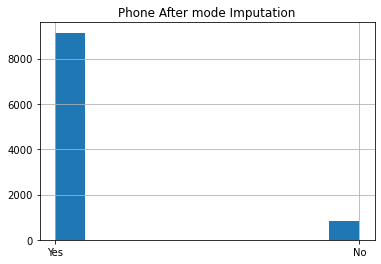

In [85]:
# Comparing histograms before and after imputation
df1['Phone'].hist()
plt.title('Phone After mode Imputation')

Text(0.5, 1.0, 'TechSupport Before Imputation')

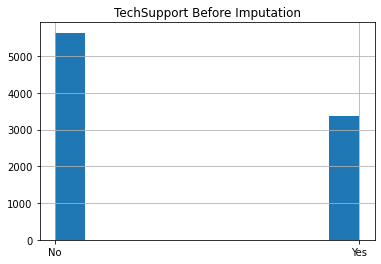

In [86]:
# Comparing histograms before and after imputation
# Original with null values
df['TechSupport'].hist()
plt.title('TechSupport Before Imputation')

In [87]:
# Counting all the yes, no, and null values in the original data
# instances in Phone for imputation example in part D6
items = df['Phone']

In [88]:
# original_counts equals the original 10,000 rows
original_counts = Counter(items)
print(original_counts)

Counter({'Yes': 8128, nan: 1026, 'No': 846})


In [89]:
# Counting all the yes, no, and null values in the clean data
# instances in Phone for imputation example
cleaned_items = df1['Phone']

In [90]:
# original_counts equals the cleaned 9,989 rows
cleaned_counts = Counter(cleaned_items)
print(cleaned_counts)

Counter({'Yes': 9143, 'No': 846})


In [91]:
# Mode imputation
df1['TechSupport'] = df1['TechSupport'].fillna(df1['TechSupport'].mode()[0])

Text(0.5, 1.0, 'TechSupport After mode Imputation')

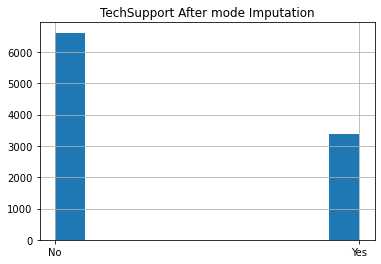

In [92]:
# Comparing histograms before and after imputation
df1['TechSupport'].hist()
plt.title('TechSupport After mode Imputation')

In [93]:
# Median imputation
df_imp['Tenure'].fillna(df_imp['Tenure'].median(), inplace=True)

Text(0.5, 1.0, 'Tenure Before Imputation')

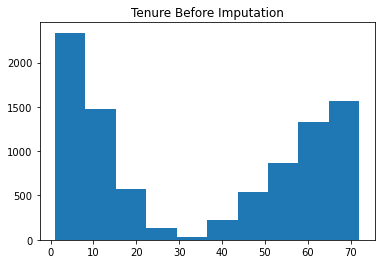

In [94]:
# Comparing histograms before and after imputation
# Original with null values
plt.hist(df['Tenure'])
plt.title('Tenure Before Imputation')

Text(0.5, 1.0, 'Tenure After Median Imputation')

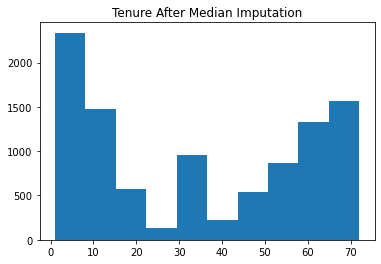

In [95]:
# Comparing histograms before and after imputation
# Using median because the original histogram distribution is skewed
# Mean imputation would be similar result
plt.hist(df_imp['Tenure'])
plt.title('Tenure After Median Imputation')

Text(0.5, 1.0, 'Tenure After Iterative Imputation')

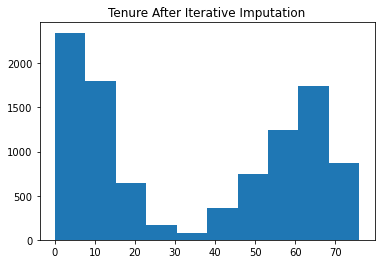

In [96]:
# Comparing histograms before and after imputation
plt.hist(df1['Tenure'])
plt.title('Tenure After Iterative Imputation')

Text(0.5, 1.0, 'Bandwidth_GB_Year Before Imputation')

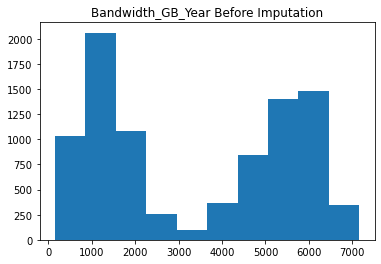

In [97]:
# Comparing histograms before and after imputation
# Original with null values
plt.hist(df['Bandwidth_GB_Year'])
plt.title('Bandwidth_GB_Year Before Imputation')

In [98]:
# Median imputation
df_imp['Bandwidth_GB_Year'].fillna(df_imp['Bandwidth_GB_Year'].median(), inplace=True)

Text(0.5, 1.0, 'Bandwidth_GB_Year After Median Imputation')

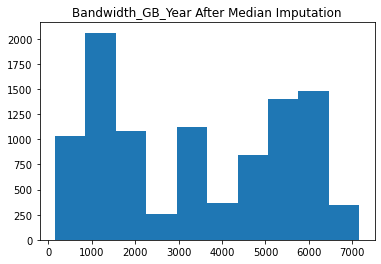

In [99]:
# Comparing histograms before and after imputation
# Using median because the original histogram distribution is skewed
# Mean imputation would be similar result
plt.hist(df_imp['Bandwidth_GB_Year'])
plt.title('Bandwidth_GB_Year After Median Imputation')

Text(0.5, 1.0, 'Bandwidth_GB_Year After Iterative Imputation')

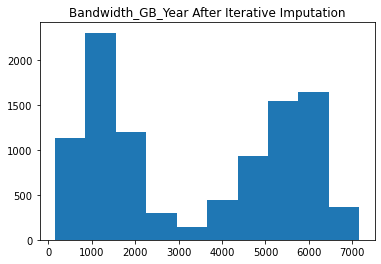

In [100]:
# Comparing histograms before and after imputation
plt.hist(df1['Bandwidth_GB_Year'])
plt.title('Bandwidth_GB_Year After Iterative Imputation')

In [101]:
# Check nullity--df should have 0 null values now
df1.isna().sum()

Unnamed: 0              0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

In [102]:
# Show that each variable now has Zero null values
print(df1['Outage_sec_perweek'].isna().sum())
print(df1['Children'].isna().sum())
print(df1['Age'].isna().sum())
print(df1['Income'].isna().sum())
print(df1['Techie'].isna().sum())
print(df1['Phone'].isna().sum())
print(df1['TechSupport'].isna().sum())
print(df1['Tenure'].isna().sum())
print(df1['Bandwidth_GB_Year'].isna().sum())

0
0
0
0
0
0
0
0
0


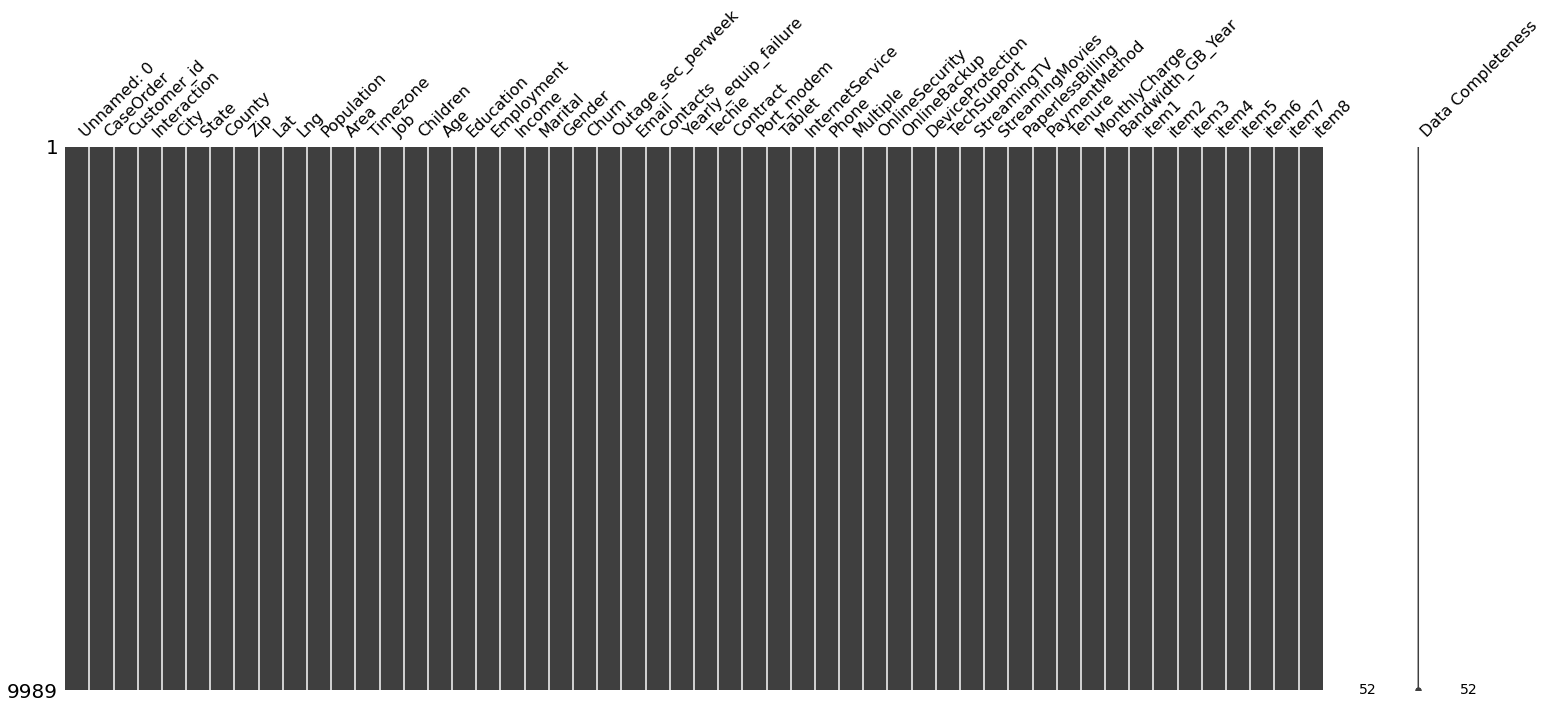

In [103]:
# Visualize the clean dataset
msno.matrix(df1, labels = True)
plt.show()

In [104]:
# Extracting csv file of clean dataset
df1.to_csv(r'C:\\Users\\eric7\\OneDrive\\Desktop\\WGU\\D206_Data_Cleaning\\Eric_Colwell_clean_dataset.csv')

In [105]:
# Checking for ouliers using Z-scores--stats
df1['Z_children'] = st.zscore(df1['Children'])
df1[['Children', 'Z_children']].head()

,Children,Z_children
0,2.0,-0.051302
1,1.0,-0.575824
2,4.0,0.997741
3,1.0,-0.575824
4,0.0,-1.100345


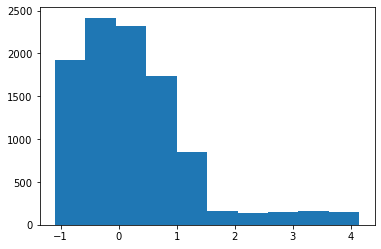

In [106]:
# Check it on the histogram
plt.hist(df1['Z_children'])
plt.show()

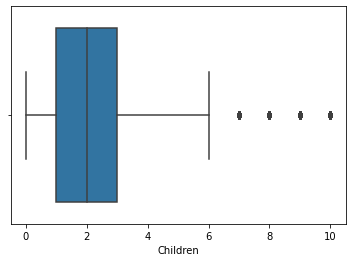

In [107]:
# Check the boxplot for outliers
boxplot = sns.boxplot(x='Children', data = df1)

In [108]:
# Checking for ouliers using Z-scores--stats
df1['Z_age'] = st.zscore(df1['Age'])
df1[['Age', 'Z_age']].head()

,Age,Z_age
0,68.0,0.806302
1,27.0,-1.430260
2,50.0,-0.175603
3,48.0,-0.284704
4,83.0,1.624557


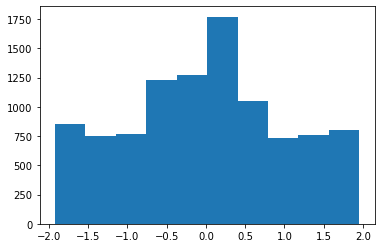

In [109]:
# Check it on the histogram
plt.hist(df1['Z_age'])
plt.show()

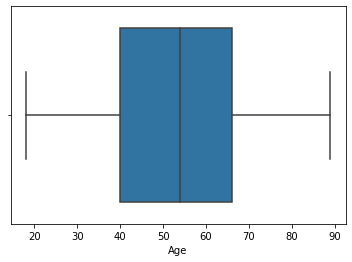

In [110]:
# Check the boxplot for outliers
boxplot = sns.boxplot(x='Age', data = df1)

In [111]:
# Checking for ouliers using Z-scores--stats
df1['Z_income'] = st.zscore(df1['Income'])
df1[['Income', 'Z_income']].head()

,Income,Z_income
0,28561.990000,-0.462754
1,21704.770000,-0.741870
2,39935.978781,0.000214
3,18925.230000,-0.855009
4,40074.190000,0.005840


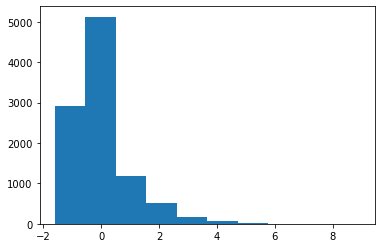

In [112]:
# Check it on the histogram
plt.hist(df1['Z_income'])
plt.show()

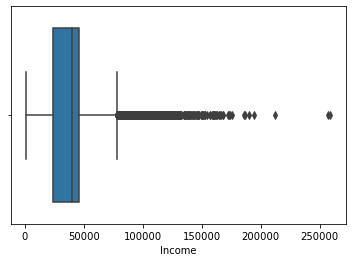

In [113]:
# Check the boxplot for outliers
boxplot = sns.boxplot(x='Income', data = df1)

In [114]:
# Checking for ouliers using Z-scores--stats
df1['Z_outage'] = st.zscore(df1['Outage_sec_perweek'])
df1[['Outage_sec_perweek', 'Z_outage']].head()

,Outage_sec_perweek,Z_outage
0,6.972566,-0.640296
1,12.014541,0.078132
2,10.245616,-0.173921
3,15.206193,0.532909
4,8.960316,-0.357063


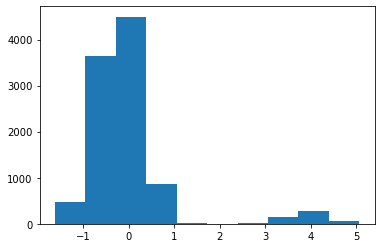

In [115]:
# Check it on the histogram
plt.hist(df1['Z_outage'])
plt.show()

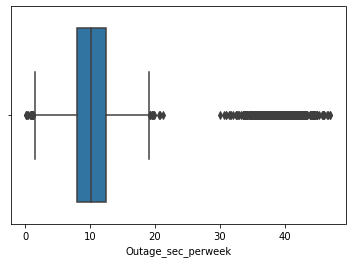

In [116]:
# Check the boxplot for outliers
boxplot = sns.boxplot(x='Outage_sec_perweek', data = df1)

In [117]:
df1[df1['Z_outage']>3]

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,item3,item4,item5,item6,item7,item8,Z_children,Z_age,Z_income,Z_outage
28,29,29,J887250,a49a3cbf-182c-49f5-b15f-e124582d2c8f,Moretown,VT,Washington,5660,44.24718,-72.74137,...,3,3,2,4,4,2,0.473219,-0.234221,-0.000109,4.625330
36,37,37,U790894,01fa4db5-6be5-47de-a3ac-53b95e5c44a8,Marlborough,CT,Hartford,6447,41.63306,-72.45472,...,5,5,2,4,5,5,-0.051302,-1.484811,-1.213629,4.739058
40,41,41,X711438,3c086e5c-e913-43b6-90d0-30b15b7cd37f,Mantoloking,NJ,Ocean,8738,40.02145,-74.06183,...,3,3,3,5,4,4,0.473219,-0.136739,-0.069985,3.909788
61,62,62,O942919,176d7713-b919-41c3-badf-676dc1abbf07,Delavan,IL,Tazewell,61734,40.37342,-89.52646,...,3,2,3,4,2,4,-0.575824,-1.539361,1.705532,4.049223
130,131,131,X645702,cfc79a87-f608-485d-86c9-cfce7db37a29,Dennison,OH,Tuscarawas,44621,40.42752,-81.29587,...,4,2,4,4,3,2,-1.100345,-0.339254,3.495835,4.022570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9894,9895,9895,M593222,8e17fc2f-b4b9-43ed-81fd-f76425fc3cce,Valley View,PA,Schuylkill,17983,40.64263,-76.54692,...,3,2,5,2,2,4,0.473219,1.624557,0.355160,4.706930
9895,9896,9896,Y827249,683654d1-0905-4992-a131-d9510c87f882,Pinson,AL,Jefferson,35126,33.73147,-86.65417,...,4,3,3,4,3,5,-1.100345,-1.593911,-0.264594,4.163351
9907,9908,9908,X106044,c504ace3-2fa9-4bf5-83cc-023d16e653cb,Valley Bend,WV,Randolph,26293,38.78246,-79.93577,...,4,4,5,3,3,3,-0.575824,-1.484811,-0.000033,3.855556
9945,9946,9946,T260778,e8f84606-857d-40c4-aac1-31a235948601,Burchard,NE,Pawnee,68323,40.14019,-96.38206,...,3,3,4,2,2,2,-1.100345,1.951859,0.000122,3.971297


In [118]:
df1[df1['Z_outage'] < -3]

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,item3,item4,item5,item6,item7,item8,Z_children,Z_age,Z_income,Z_outage


In [119]:
# Look at the unique values again for ordinal encoding purposes
df1.Education.unique()

array(["Master's Degree", 'Regular High School Diploma',
       'Doctorate Degree', 'No Schooling Completed', "Associate's Degree",
       "Bachelor's Degree", 'Some College, Less than 1 Year',
       'GED or Alternative Credential',
       'Some College, 1 or More Years, No Degree',
       '9th Grade to 12th Grade, No Diploma',
       'Nursery School to 8th Grade', 'Professional School Degree'],
      dtype=object)

In [120]:
# Create a new variable for encoding
df1['education_numeric'] = df1['Education']

In [121]:
# Create a dictionary for converting categorical values to numeric
dict_edu = {'education_numeric': 
            {'No Schooling Completed': 0,
            'Nursery School to 8th Grade': 8,
            '9th Grade to 12th Grade, No Diploma': 10,
            'GED or Alternative Credential': 11,
            'Regular High School Diploma': 12,
            'Some College, Less than 1 Year': 13,
            'Some College, 1 or More Years, No Degree': 14,
            'Professional School Degree': 15,
            "Associate's Degree": 16,
            "Bachelor's Degree": 18,
            "Master's Degree": 20,
            'Doctorate Degree': 22}}

In [122]:
# Put the new encoded variable into the dataframe
df1.replace(dict_edu, inplace=True)

In [123]:
# Just looking at the difference
df1['Education']

0                      Master's Degree
1          Regular High School Diploma
2          Regular High School Diploma
3                     Doctorate Degree
4                      Master's Degree
                     ...              
9995    Some College, Less than 1 Year
9996       Regular High School Diploma
9997       Nursery School to 8th Grade
9998                 Bachelor's Degree
9999     GED or Alternative Credential
Name: Education, Length: 9989, dtype: object

In [124]:
# Check to make sure it is numeric
df1['education_numeric']

0       20
1       12
2       12
3       22
4       20
        ..
9995    13
9996    12
9997     8
9998    18
9999    11
Name: education_numeric, Length: 9989, dtype: int64

In [125]:
# Look at the unique values again for ordinal encoding purposes
df1.Employment.unique()

array(['Part Time', 'Retired', 'Student', 'Full Time', 'Unemployed'],
      dtype=object)

In [126]:
# Create a new variable for encoding
df1['employment_numeric'] = df1['Employment']

In [127]:
# Create a dictionary for converting categorical values to numeric
dict_emp = {'employment_numeric': 
            {'Unemployed': 0,
            'Student': 1,
            'Part Time': 2,
            'Full Time': 3,
            'Retired': 4}}

In [128]:
# Put the new encoded variable into the dataframe
df1.replace(dict_emp, inplace=True)

In [129]:
# Check to make sure it is numeric
df1['employment_numeric']

0       2
1       4
2       1
3       4
4       1
       ..
9995    4
9996    2
9997    3
9998    3
9999    3
Name: employment_numeric, Length: 9989, dtype: int64

In [130]:
# Look at the unique values again for ordinal encoding purposes
df1.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [131]:
# Create a new variable for encoding
df1['churn_numeric'] = df1['Churn']

In [132]:
# Create a dictionary for converting categorical values to numeric
dict_churn = {'churn_numeric': 
            {'No': 0,
            'Yes': 1}}

In [133]:
# Put the new encoded variable into the dataframe
df1.replace(dict_churn, inplace=True)

In [134]:
# Check to make sure it is numeric
df1.churn_numeric.unique()

array([0, 1], dtype=int64)

In [135]:
# Look at the unique values again for ordinal encoding purposes
df1.InternetService.unique()

array(['Fiber Optic', 'DSL', 'None'], dtype=object)

In [136]:
# Create a new variable for encoding
df1['int_serv_numeric'] = df1['InternetService']

In [137]:
# Create a dictionary for converting categorical values to numeric
dict_int_serv = {'int_serv_numeric': 
            {'None': 0,
            'DSL': 1,
            'Fiber Optic': 2}}

In [138]:
# Put the new encoded variable into the dataframe
df1.replace(dict_int_serv, inplace=True)

In [139]:
# Check to make sure it is numeric
df1.int_serv_numeric.unique()

array([2, 1, 0], dtype=int64)

In [140]:
# Check shape of original df for comparison
print(df.shape)

(10000, 52)


In [141]:
# Check shape of df1 to show that there are now more variables
print(df1.shape)

(9989, 60)


In [142]:
# Check the info again for the new variables
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9989 entries, 0 to 9999
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9989 non-null   int64  
 1   CaseOrder             9989 non-null   int64  
 2   Customer_id           9989 non-null   object 
 3   Interaction           9989 non-null   object 
 4   City                  9989 non-null   object 
 5   State                 9989 non-null   object 
 6   County                9989 non-null   object 
 7   Zip                   9989 non-null   int64  
 8   Lat                   9989 non-null   float64
 9   Lng                   9989 non-null   float64
 10  Population            9989 non-null   int64  
 11  Area                  9989 non-null   object 
 12  Timezone              9989 non-null   object 
 13  Job                   9989 non-null   object 
 14  Children              9989 non-null   float64
 15  Age                  

In [143]:
# Specify variables used to perform PCA
df1_pca = df1[['Age', 'Income', 'Outage_sec_perweek',
               'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

In [144]:
# Normalizing data in preparation for PCA
df1_pca_normalized = (df1_pca - df1_pca.mean()) / df1_pca.std()

In [145]:
# Take a look at the normalized data
df1_pca_normalized

,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,0.806262,-0.462730,-0.640264,-1.053815,-0.060627,-1.143268
1,-1.430189,-0.741833,0.078128,-1.267963,1.589481,-1.190846
2,-0.175595,0.000214,-0.173912,-0.713589,-0.337791,-0.614817
3,-0.284690,-0.854966,0.532882,-0.662962,-1.242278,-0.564335
4,1.624476,0.005840,-0.357045,-1.248431,-0.538098,-1.434122
...,...,...,...,...,...,...
9995,-0.652978,0.642808,-0.313577,1.278057,-0.328827,1.432764
9996,-0.284690,-0.000443,-0.477367,1.006262,0.802681,1.058170
9997,0.312743,0.000160,-0.944446,0.456288,-0.135146,0.352151
9998,-0.775618,-0.946857,0.086951,1.388134,1.812900,1.413101


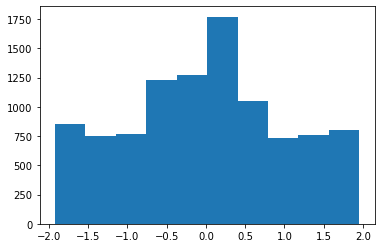

In [146]:
# Check it on the histogram
plt.hist(df1_pca_normalized['Age'])
plt.show()

In [147]:
# Identify the number of PCs you want extracted
pca = PCA(n_components = df1_pca_normalized.shape[1])

In [148]:
# Fit it and output how many PCs or components
pca.fit(df1_pca_normalized)

PCA(n_components=6)

In [149]:
# Apply the PCA
df1_pca2 = pd.DataFrame(pca.transform(df1_pca_normalized),
                       columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [150]:
# Create loadings
loadings = pd.DataFrame(pca.components_.T,
                       columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
                       index = df1_pca_normalized.columns)

# View the output of the loadings
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Age,-0.010296,-0.061768,-0.870242,0.463163,0.153146,0.028004
Income,0.002916,0.002128,0.461135,0.885523,-0.056475,-0.001183
Outage_sec_perweek,0.020308,0.708259,0.075187,0.003831,0.701608,0.005894
Tenure,0.705391,-0.054110,-0.015738,0.007725,0.041775,-0.705296
MonthlyCharge,0.044686,0.701062,-0.155102,0.034731,-0.692180,-0.046249
Bandwidth_GB_Year,0.707035,-0.011576,0.008770,-0.006919,-0.015619,0.706823


In [151]:
# Create covariance matrix and eigenvalues
cov_matrix = np.dot(df1_pca_normalized.T, df1_pca_normalized) / df1_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

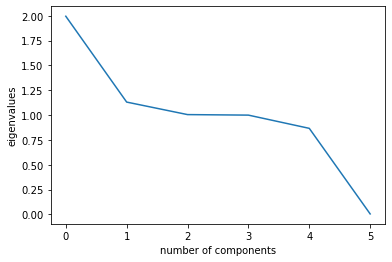

In [152]:
# Create scree plot
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.show()